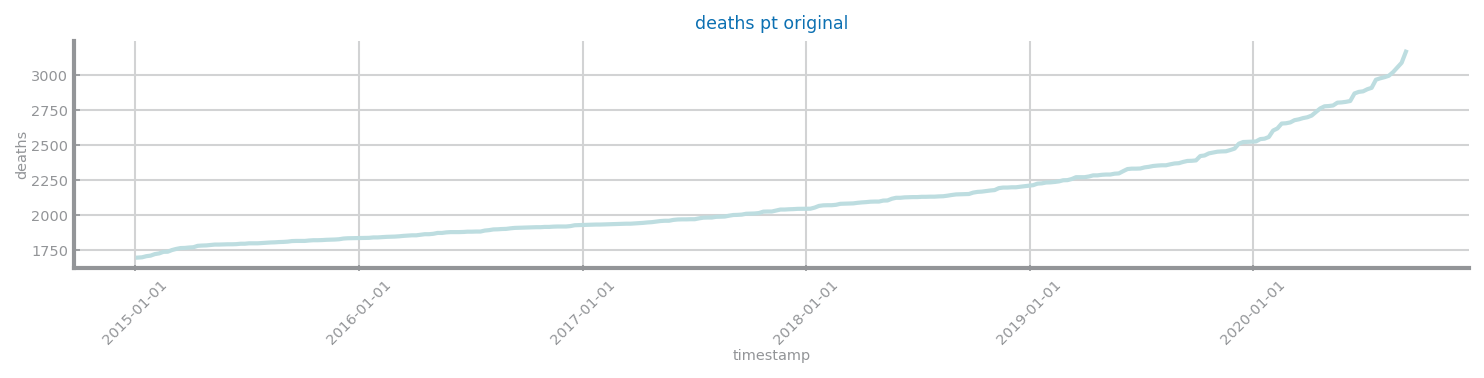

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ts_functions as ts
import ds_functions as ds

data = pd.read_csv('deaths_pt.csv', index_col='start_date', sep=',', decimal='.',
                   parse_dates=True, infer_datetime_format=True)

x_label='timestamp'
y_label='deaths'
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT/2))
ts.plot_series(data, x_label=x_label, y_label=y_label, title='deaths pt original')
plt.xticks(rotation = 45)
plt.show()

<Figure size 1800x300 with 0 Axes>

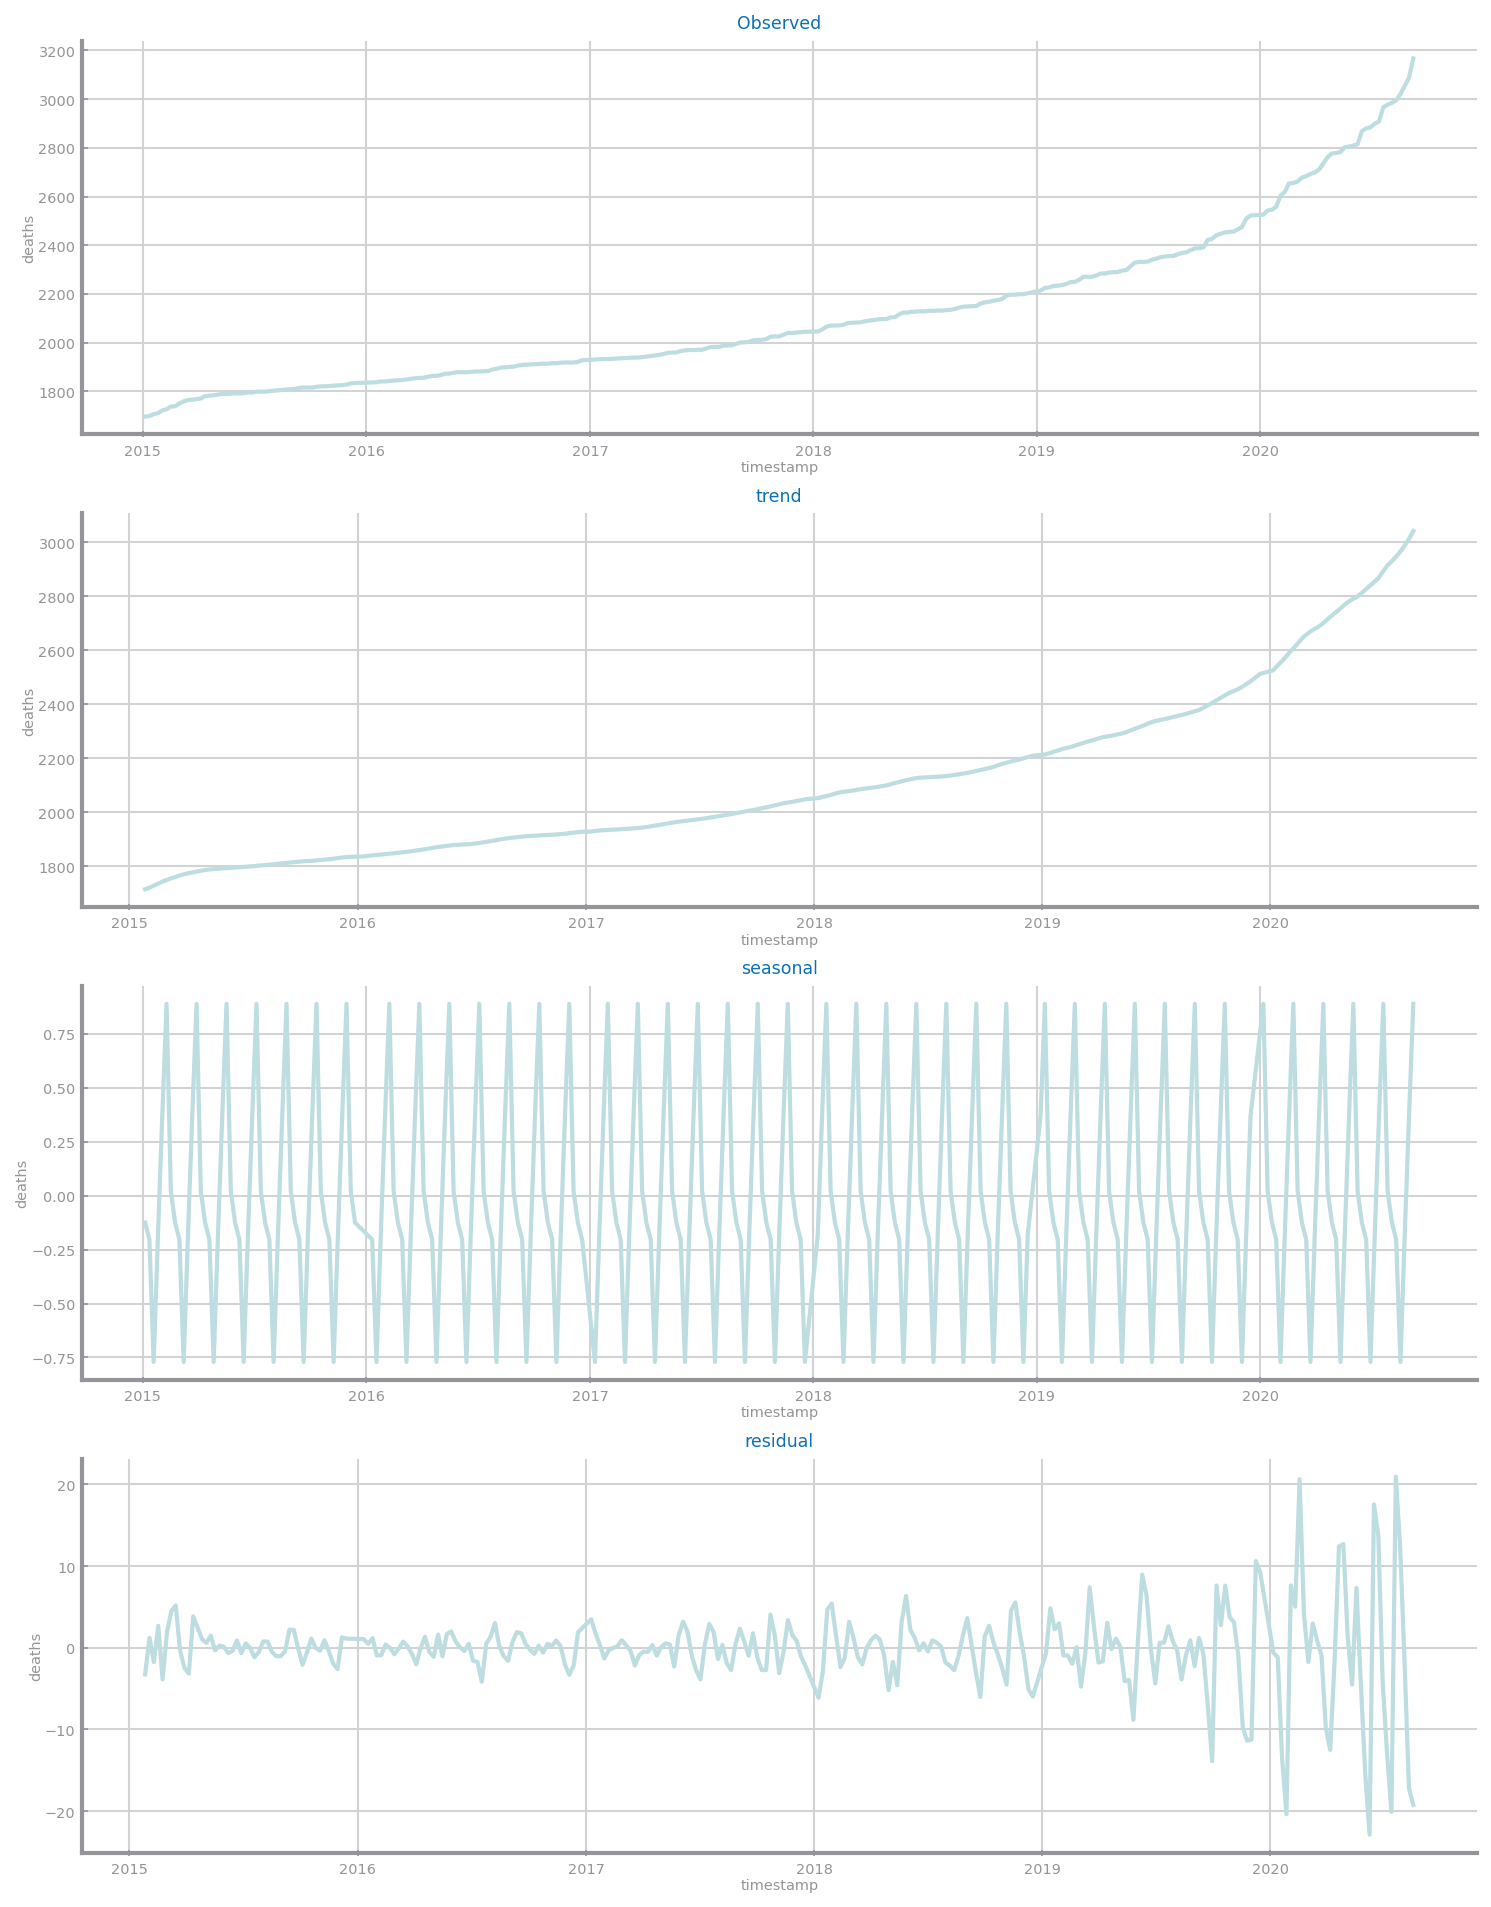

In [2]:
import statsmodels.tsa.seasonal as seasonal

FIG_WIDTH, FIG_HEIGHT = 3*ts.HEIGHT, ts.HEIGHT/2

def plot_components(series: pd.Series, comps: seasonal.DecomposeResult, x_label: str = 'time', y_label:str =''):
    lst = [('Observed', series), ('trend', comps.trend), ('seasonal', comps.seasonal), ('residual', comps.resid)]
    _, axs = plt.subplots(len(lst), 1, figsize=(3*ts.HEIGHT, ts.HEIGHT*len(lst)))
    for i in range(len(lst)):
        axs[i].set_title(lst[i][0])
        axs[i].set_ylabel(y_label)
        axs[i].set_xlabel(x_label)
        axs[i].plot(lst[i][1])

#limpar a primeira semana do dataset
decomposition = seasonal.seasonal_decompose(data, model = "add", period = 7)
plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))
plot_components(data, decomposition, x_label='timestamp', y_label='deaths')
plt.show()

# Arima

C:\Users\Utilizador\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Utilizador\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Utilizador\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


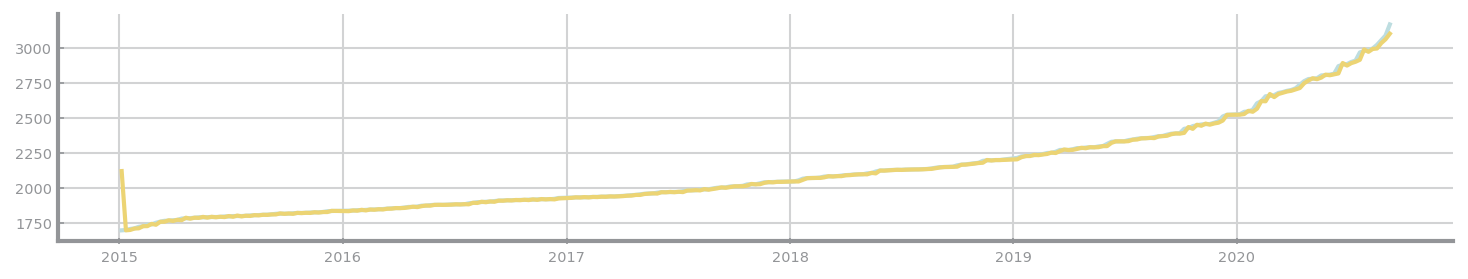

In [3]:
from matplotlib import pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

df = data
model = ARIMA(df, order=(2,0,2))
results = model.fit()
plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))
plt.plot(df)
plt.plot(results.fittedvalues)
plt.show()

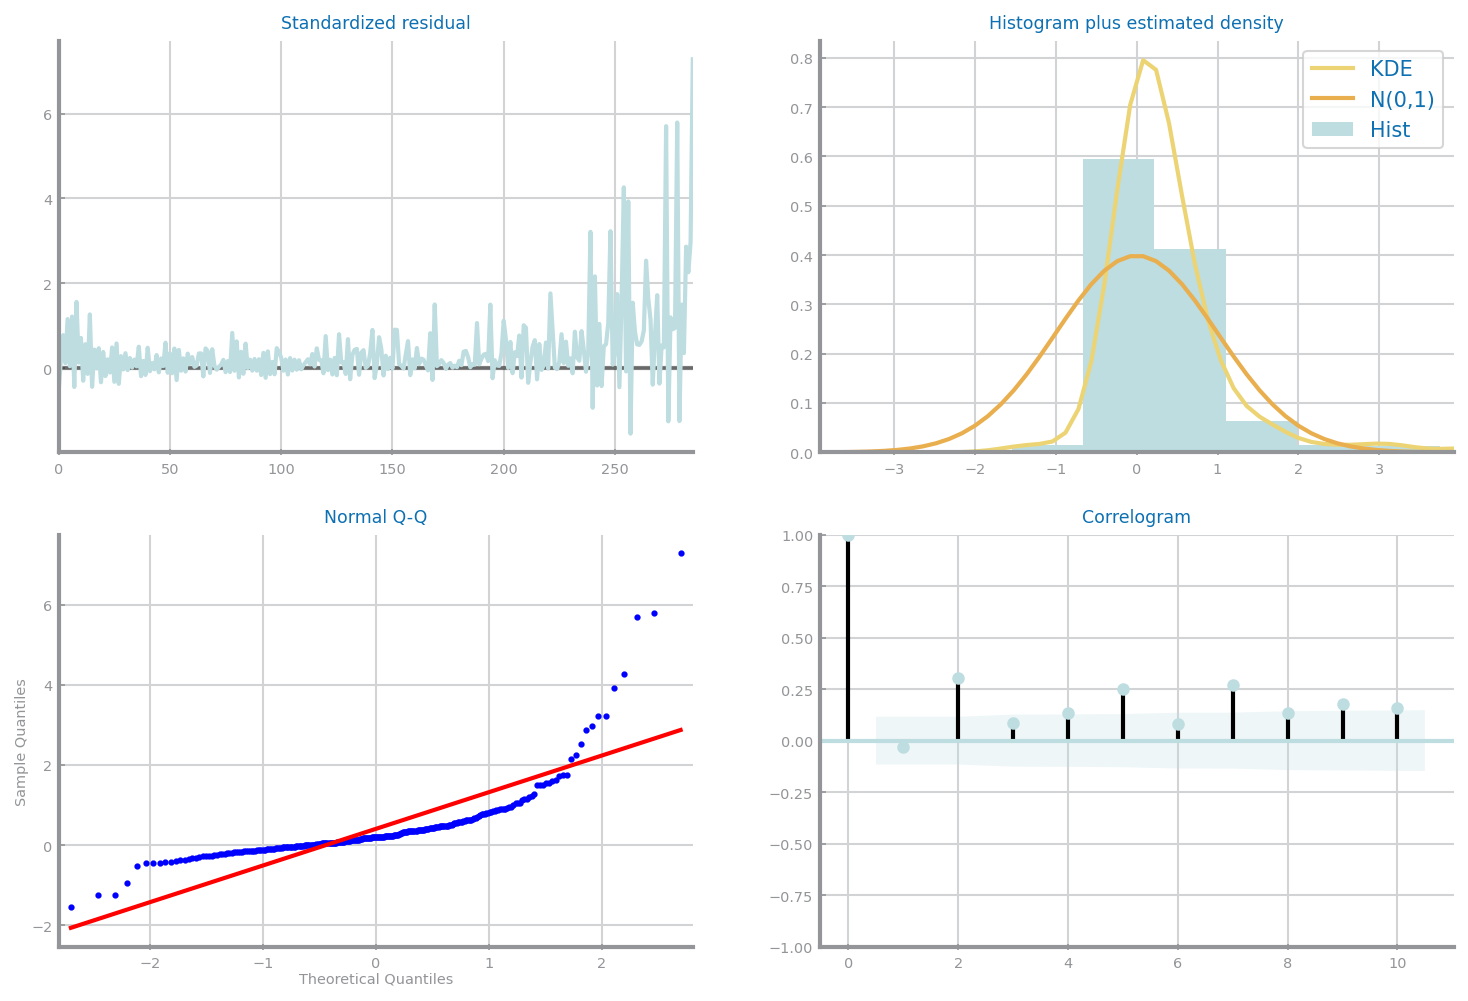

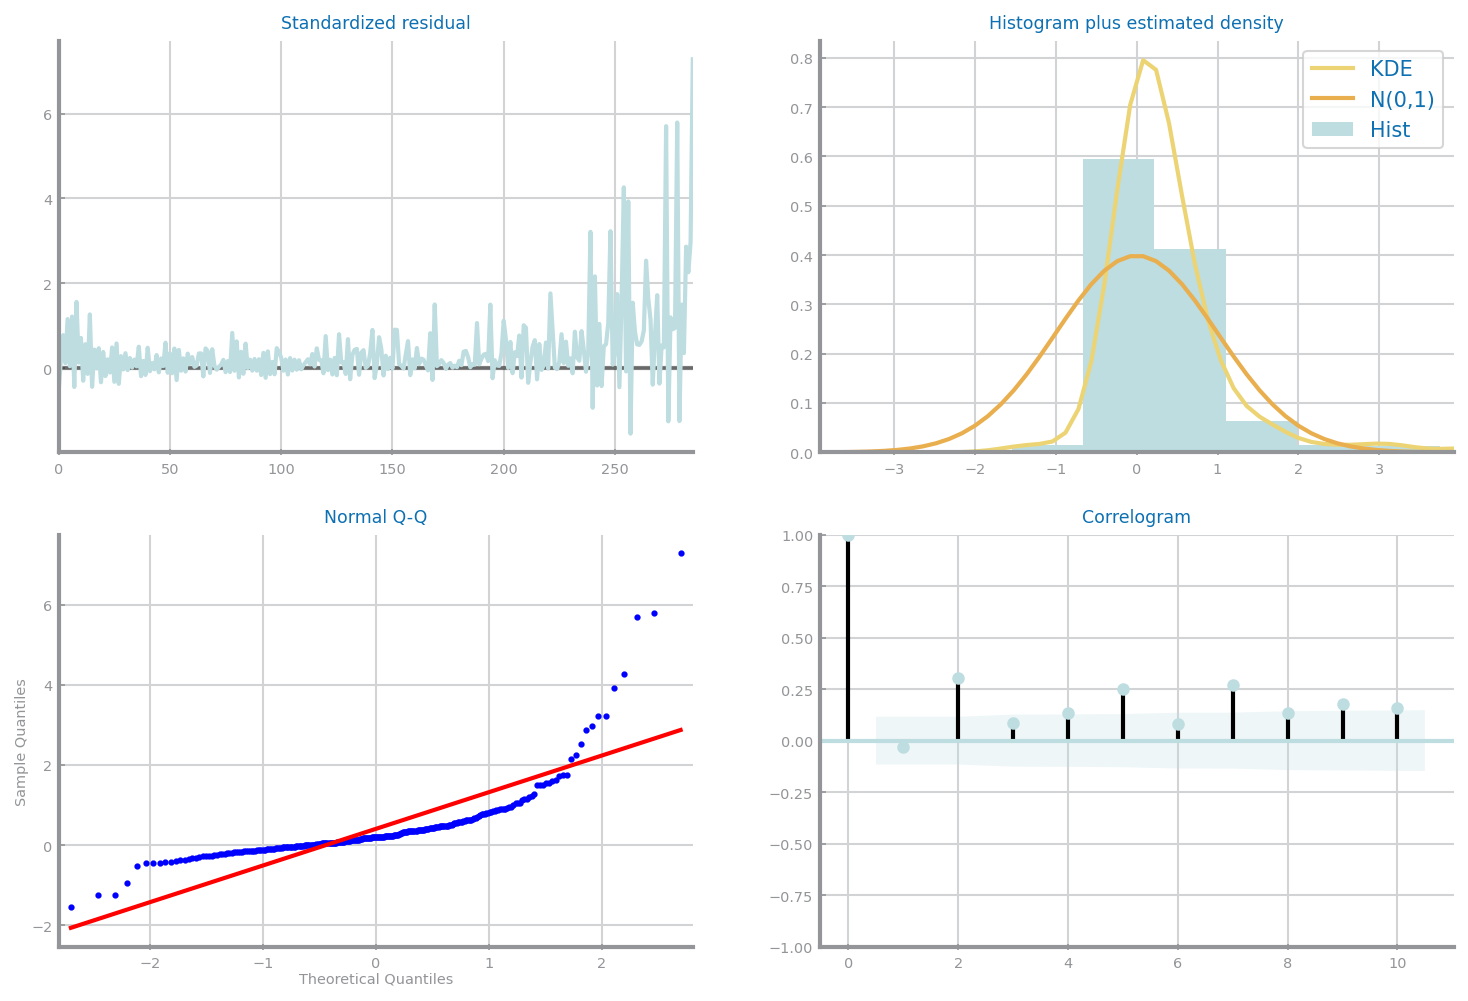

In [4]:
results.plot_diagnostics(figsize=(FIG_WIDTH, 4*FIG_HEIGHT))

C:\Users\Utilizador\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Utilizador\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Utilizador\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Utilizador\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provide

C:\Users\Utilizador\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\Utilizador\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Utilizador\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Utilizador\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so wi

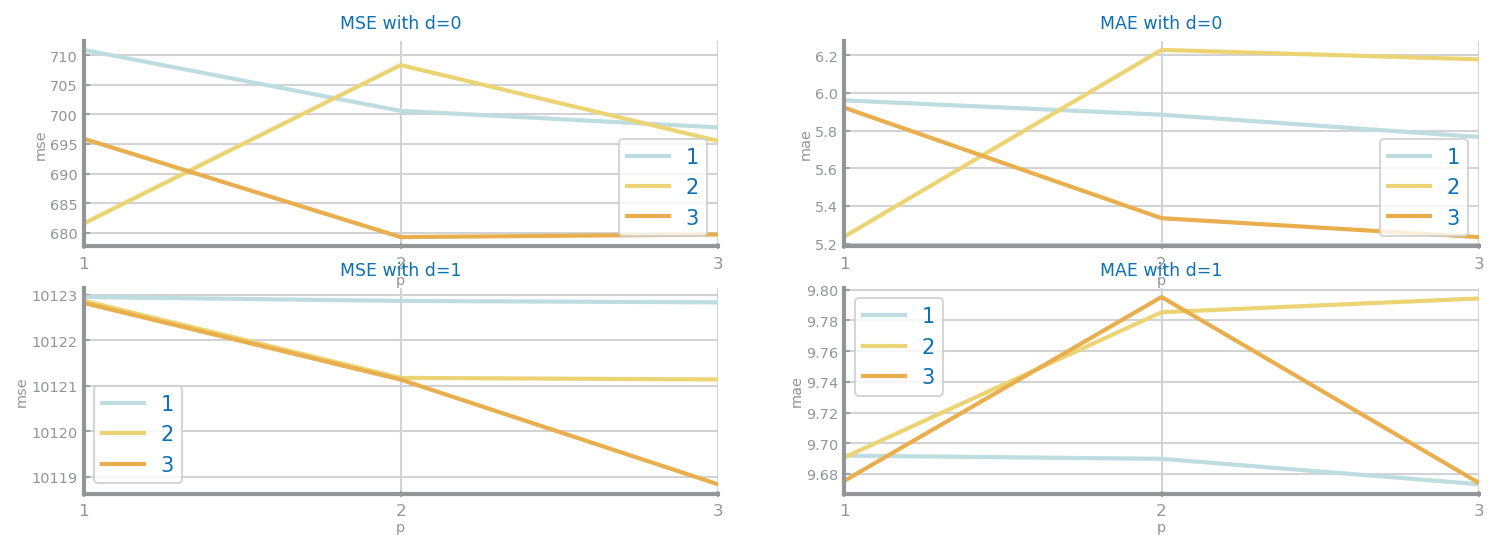

In [5]:
_, axs = plt.subplots(2, 2, figsize=(FIG_WIDTH, 2*FIG_HEIGHT))
params = (1, 2, 3)
for d in (0, 1):
    mse = {}
    mae = {}
    for p in params:
        mse_lst = []
        mae_lst = []
        for q in params:
            mod = ARIMA(df, order=(p, d, q))
            results = mod.fit()
            mse_lst.append(results.mse)
            mae_lst.append(results.mae)
        mse[p] = mse_lst
        mae[p] = mae_lst
    ds.multiple_line_chart(params, mse, ax=axs[d, 0], title=f'MSE with d={d}', xlabel='p', ylabel='mse')
    ds.multiple_line_chart(params, mae, ax=axs[d, 1], title=f'MAE with d={d}', xlabel='p', ylabel='mae')
plt.show()

In [6]:
def plot_forecasting(train: pd.Series, test: pd.Series, pred,
                     ax: plt.Axes=None, x_label: str = 'time', y_label:str =''):
    if ax is None:
        ax = plt.gca()
    ax.plot(train, label='train')
    ax.plot(test, label='test')
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.plot(pred.index, pred.values, label='predicted', color='r')
    plt.legend()

p, d, q = 2, 1, 2
n = len(df)
train = df[:n*9//10]
test = df[n*9//10+1:]

mod = ARIMA(train, order=(p, d, q))
mod = mod.fit()
pred = mod.predict(start = len(train), end = len(df)-1)

print(train)
print(pred)

plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))
plot_forecasting(train, test, pred, x_label=x_label, y_label=y_label)
plt.show()

C:\Users\Utilizador\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Utilizador\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Utilizador\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Utilizador\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is availab

            deaths
start_date        
2015-01-05    1697
2015-01-12    1699
2015-01-19    1707
2015-01-26    1711
2015-02-02    1722
...            ...
2020-01-20    2546
2020-01-27    2558
2020-02-03    2604
2020-02-10    2619
2020-02-17    2654

[257 rows x 1 columns]
257    2673.476236
258    2691.593105
259    2710.911662
260    2729.018372
261    2748.188083
262    2766.277001
263    2785.305749
264    2803.370131
265    2822.264960
266    2840.298855
267    2859.066056
268    2877.064216
269    2895.709416
270    2913.667217
271    2932.195451
272    2950.108824
273    2968.524603
274    2986.389969
275    3004.697337
276    3022.511556
277    3040.714142
278    3058.474461
279    3076.575524
280    3094.279536
281    3112.282009
282    3129.927612
283    3147.834136
284    3165.419498
285    3183.232456
dtype: float64


ValueError: view limit minimum -36613.9 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

In [ ]:
fig, axs = plt.subplots(5, 1, figsize=(FIG_WIDTH, 5*FIG_HEIGHT))
fig.suptitle(f'ARIMA predictions (p={p},d={d},q={q})')
k = 0
for i in range(50, 100, 10):
    train = df[:n*i//100]
    test = df[n*i//100+1:]

    mod = ARIMA(train, order=(p, d, q))
    mod = mod.fit()
    pred = mod.predict(start = len(train), end = len(df)-1)
    plot_forecasting(train, test, pred, ax=axs[k], x_label=x_label, y_label=y_label)
    k += 1
plt.show()